## Lab 3: Linked Lists and Sorting 

By: ** Ryan Neff **  
ryan.neff@icahn.mssm.edu  
Due: 1/30/19

In [1]:
'''
Problem 1: Naive peak finding.
In class we discussed an algorithm to return a peak in a 1d array. Implement a function naive_peak_1d() that takes an 
array and returns a peak.
'''
a = [6, 7, 4, 3, 2, 1, 4, 5]

def naive_peak_1d(a):
    peaks = []
    if a[1] < a[0]:
        peaks.append(a[0])
    for ix in range(1,len(a)-1):
        if (a[ix-1] < a[ix]) & (a[ix+1] < a[ix]):
            peaks.append(a[ix])
    if a[len(a)-1] > a[len(a)-2]:
        peaks.append(a[len(a)-1])
    return peaks

print(naive_peak_1d(a))


[7, 5]


In [2]:
'''
Problem 2:
Rosalind: Insertion Sort
http://rosalind.info/classes/581/

Translate the following pseudocode into python and verify its performance on the downloaded file 'rosalind_ins.txt'

insertion_sort(A[1..n])
    for i <- 2 to n do
        k <- i
        while k > 1 and A[k] < A[k-1]
            SWAP(A[k-1], A[k])
            k <- k -1

Input: A string A of integers separated by spaces, e.g. A = '-323 2 32 ... 3'

Output: The number of times the swap operation was performed (hint: this will require modifying the pseudocode a little bit) 
and (optionally) the sorted array.

'''
import numpy as np
with open('rosalind_ins.txt', 'r') as f:
    f.readline() # skips the line indicating number of entries
    A = np.array([int(x) for x in f.readline().strip().split(' ')])
    # f.readline() = '-323 2 32 ... 3\n'
    # f.readline().strip() = '-323 2 32 ... 3'
    # f.readline().strip().split(' ') = ['-323', '2', '32', ... '3']
    
def insertion_sort(A):
    count = 0
    for i in range(1,len(A)):
        k = i
        while k > 0 and A[k] < A[k-1]:
            A[k-1],A[k] = A[k],A[k-1] #pass by value
            k -= 1
            count += 1
    return count
            

insertion_sort(A)

202594

Selection:
A= E X A M P L E
E X A M P L E
A X E M P L E
A E X M P L E
A E E M P L X
A E E L P M X
A E E L M P X
A E E L M P X
Insertion:
A= E X A M P L E
E X A M P L E
E X A M P L E
A E X M P L E
A E M X P L E
A E M P X L E
A E L M P X E
A E E L M P X


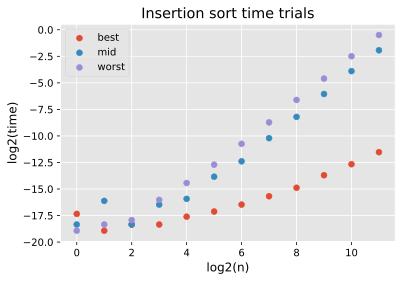

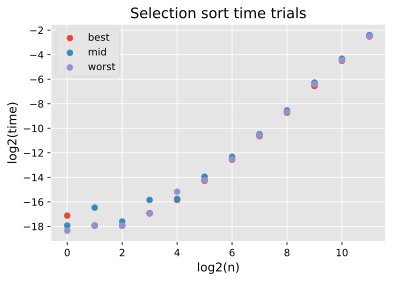

In [1]:
'''
Problem 3. Comparing insertion and selection sorts
(a) Using the array A = E X A M P L E draw traces for each outer loop iteration of insertion and selection sort.

    ANSWER: See output below.

(b) If the input array is already sorted, what are the runtimes of selection and insertion sort? Which is faster?

    ANSWER: Selection sort: O(n^2)
            Insertion sort: O(n)

(c) Describe the worst-case input array.

    ANSWER: Worst case input array is one that is reverse sorted, requiring 
            every element to be moved.

(d) What is the expected runtime of insertion sort on an array with only 3 unique 
values relative to the inputs in (b) and (c)? Note that an analytical formula is not expected 
(e.g. O(n^3/2)) but rather empirical demonstration is sufficient, i.e. 
    -conduct a doubling experiment (from n = 1 to n = 2048) and empirically graph on a 
log-log plot the runtimes as a function of problem size.
    
    ANSWER: See output below.
    
    - Create a function time_trial() that takes in an array as input and 
returns the time it takes for insertion sort to run on it.
    
    ANSWER: See output below. I did it for both selection and insertion sort. 
    
    - Create a function test_n() that returns the runtimes for insertion_sort 
on best, mid case (defined as the 3 unique values array) and worst case 
arrays as a function of n (their length). This function should generate 
the arrays in the process.
    
    ANSWER: See output below. I did it for both selection and insertion sort.

'''
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

plt.style.use('ggplot')
rcParams['figure.figsize'] = (5,4)
rcParams['figure.dpi'] = 200
rcParams['font.family'] = 'DejaVu Sans'

COLOR = 'black'
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR

# selection
def selection_sort(A,output=False):
    if output:
        print("Selection:")
        print("A="," ".join(A))
    for i in range(len(A)):
        if output:
            print(" ".join(A))
        min_idx = i
        # inner loop compares the current value to all remaining
        # complexity and cost?
        for j in range(i + 1, len(A)):
            if A[min_idx] > A[j]:
                min_idx = j

        # work of exchange happens outside inner loop
        # complexity and cost?
        A[i], A[min_idx] = A[min_idx], A[i]
    return A
    
# insertion - take from Rosalind above
def insertion_sort(A,output=False):
    count = 0
    if output:
        print("Insertion:")
        print("A="," ".join(A))
    for i in range(1,len(A)):
        if output:
            print(" ".join(A))
        k = i
        while k > 0 and A[k] < A[k-1]:
            A[k-1],A[k] = A[k],A[k-1] #pass by value
            k -= 1
            count += 1
    if output:
        print(" ".join(A))
    return count

a = ["E","X","A","M","P","L","E"]
selection_sort(a.copy(),output=True)
insertion_sort(a.copy(),output=True)

import time
import numpy as np

# TO DO
def time_trial(n, func):
    start = time.process_time()
    output = func(n)
    fin = time.process_time()
    return fin - start 

# TO DO
def test_n(n,func):
    best = list(range(n))
    best_case_time = time_trial(best,func)
    
    mid = list(np.random.randint(low = 0, high = 3, size = n))
    mid_case_time = time_trial(mid,func)
    
    worst = best[::-1].copy()
    worst_case_time = time_trial(worst,func)
    return [n, best_case_time, mid_case_time, worst_case_time]

    
n = 1
n_max = 2049
data = []
while n < n_max:
    data.append(test_n(n,insertion_sort))
    n = n * 2
data = np.log(np.array(data))/np.log(2)

n_data = data[:,0]
best_data = data[:,1]
mid_data = data[:,2]
worst_data = data[:,3]

plt.figure(figsize=(6, 4))
plt.scatter(n_data, best_data)
plt.scatter(n_data, mid_data)
plt.scatter(n_data, worst_data)
plt.legend(["best","mid","worst"])
plt.title("Insertion sort time trials")
plt.ylabel("log2(time)")
plt.xlabel("log2(n)")
plt.show()

n = 1
n_max = 2049
data = []
while n < n_max:
    data.append(test_n(n,selection_sort))
    n = n * 2
data = np.log(np.array(data))/np.log(2)

n_data = data[:,0]
best_data = data[:,1]
mid_data = data[:,2]
worst_data = data[:,3]

plt.figure(figsize=(6, 4))
plt.scatter(n_data, best_data)
plt.scatter(n_data, mid_data)
plt.scatter(n_data, worst_data)
plt.legend(["best","mid","worst"])
plt.title("Selection sort time trials")
plt.ylabel("log2(time)")
plt.xlabel("log2(n)")
plt.show()

In [55]:
'''
Problem 4a: Linked List - the Node class
Online-formulation of LinkedList (moderate) 
(a) Create a Node class with argument 'data' and has attributes 'initdata' (set to the argument initdata) 
and 'next' (set to None).
(b) Define a method getData that returns data.
(c) Define a method getNext that returns the pointer to the next node.
(d) Define a method setData that sets the data attribute to newdata.
(e) Define a method setNext that sets the next attribute to newnext (pointer to next node).
'''
## TO DO
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None
    def getData(self):
        return self.data
    def getNext(self):
        return self.next
    def setData(self,newdata):
        self.data = newdata
    def setNext(self,newnext):
        self.next = newnext
        
    def __hash__(self):
        return hash(self.data)
    
    def __repr__(self):
        return "<Node, data='{}'>".format(self.data)
    
    def __str__(self):
        return self.__repr__()
    
    def __eq__(self,other):
        return self.__hash__() == other.__hash__()
  
'''
Problem 4b: Linked List - the LinkedList class
Implement methods in the LinkedList class to 
(a) add: add a new node to the front of the linked list 
(b) size: return the number of linked list member nodes through a linear search of the list
(c) get_index: return the pointer to the node in index position n, where n is supplied to the function.
'''
from copy import copy
# TO DO
class LinkedList:
    def __init__(self):
        self.head = None
    
    def add(self,newitem): #ADDS to front of list (so it will be in reverse order!)
        tmp = self.head
        newnode = Node(newitem)
        self.head = newnode
        self.head.setNext(tmp)
    
    def get_index(self,pos):
        node = self.head
        if pos > self.size():
            raise IndexError(pos)
        for i in range(1,pos):
            node = node.getNext()
        return node
            
    def size(self):
        count = 0
        node = self.head
        while type(node) != type(None):
            count += 1
            node = node.getNext()
        return count

# tests; construct a lists
mylist = LinkedList()
mylist.add('BMI2005') # 3
mylist.add('BMS') # 2
mylist.add('Biostatistics') # 1
mylist.add('RCR') # 0

# example operations/methods on instance
print('get size of list')
print(mylist.size())
print('get item in index 3')
print(mylist.get_index(3))
print('get item in index 8 (DNE)')
try:
    mylist.get_index(8)
except IndexError as err:
    print("Caught IndexError for out-of-bounds access.")

get size of list
4
get item in index 3
<Node, data='BMS'>
get item in index 8 (DNE)
Caught IndexError for out-of-bounds access.


In [61]:
'''
BONUS PROBLEM:
Document Distance, dictionary approach
Adapted from MIT OCW

Input: Two document strings D_1 and D_2

Output: Document distance d(D_1, D_2) defined as:

    Define U as the sorted array of all words found in both D_1 and D_2 i.e. the union of D_1 and D_2.
    The 'word count vector' A_1 of length |U| has positive integer entries in A_1[i] corresponding to the number of times word i 
    appears in document 1.
    E.g. if D_1 = 'the cat' and D_2 = 'the dog' then U = ['cat', 'dog', 'the'] and A_1 = [1 0 1] and A_2 = [0 1 1]

    Define the document distance as the product of counts of shared words, i.e. 
    d(D_1, D_2) = 1*0 + 0*1 + 1*1 = 1
    Normalizing for word count (otherwise longer documents would have higher scores)
    d'(D_1, D_2) = d(D_1, D_2) / ( |A_1| * |A_2| ) where |A_1| is the norm of vector A_1

    d'(D_1, D_2) = dot product of A_1 and A_2

    To make this more geometrically interpretable, we use np.arccos to take the inverse cosine
    - a dot product of 1 evaluates to arccos of 0 meaning perfect similarity
    - a dot product of 0 evaluates to arccos of 90 indicating orthogonality, or complete difference
    - note that arccos returns radians
    
    ### ANSWER: See below.

What is the runtime of your program in terms of D_1 and D_2?
    
    ### ANSWER: 
        get_sorted_words: O(d1_n*log(d1_n)) + O(d2_n*log(d2_n))
        get_word_counts: O(d1_n) + O(d2_n)
        calculate_distance: - for small numbers of words, its ~O(d1_n)*2+O(d2_n)
                            - for large numbers of words, typical worst case runtime is ~O(35000)*3
                            since we're talking about unique words and not the words in the documents
                            themselves. 
        overall: ~O(d1_n*(log(d1_n)+3) + d2_n*(log(d2_n)+2))

'''
doc1 = 'Lorem ipsum dolor'
doc2 = 'ipsum dolor sit amet'

def get_sorted_words(doc):
    doc = doc.lower()
    words = doc.split(" ")
    return sorted(words) #n*log(n)

from collections import defaultdict

def get_word_counts(words):
    word_counts = defaultdict(int)
    for word in words: #n
        word_counts[word] += 1
    return dict(word_counts)


import numpy as np

doc1_word_counts = get_word_counts(get_sorted_words(doc1))
doc2_word_counts = get_word_counts(get_sorted_words(doc2))

def calculate_distance(doc1_word_counts,doc2_word_counts):
    total = 0
    for word in doc1_word_counts: #min: d1_N; max: ~35,000 commonly used words in english language
        if word in doc2_word_counts: #avg: O(1) (python dictionary lookup using hash values)
            total += doc1_word_counts[word] * doc2_word_counts[word]

    def norm(a):
        tot = 0
        for i in a:
            tot += i**2
        return np.sqrt(tot)

    doc1_norm = norm(list(doc1_word_counts.values())) #min: d1_N; max: ~35,000 commonly used words in english language
    doc2_norm = norm(list(doc2_word_counts.values())) #min: d2_N; max: ~35,000 commonly used words in english language

    dd = total / (doc1_norm*doc2_norm)
    print(np.arccos(dd)*180/np.pi)

calculate_distance(doc1_word_counts,doc2_word_counts)

54.7356103172
